In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.gaussian_process as skgp
from scipy.stats import norm

from sklearn.isotonic import IsotonicRegression

In [2]:
D = 3
N = 1e8
#true_nlist = [1.5] + list(range(2, 21))
true_nlist = [1.5, 3, 6, 12, 24]
#true_nlist = list(range(2, 21))
m = 2/3
#nlist = [round((tnn-2*m)/(1-m),4) for tnn in true_nlist]
nlist = [round(tnn/(1-m)-1, 4) for tnn in true_nlist]
s = 1.0
sc = 1.0
c = s / sc
L = 1.0
num_empty = 200
res_dir = 'nsc-setisaturday-numempty200'
randix = 0

smoothing_method = 'isotonic+rolling'

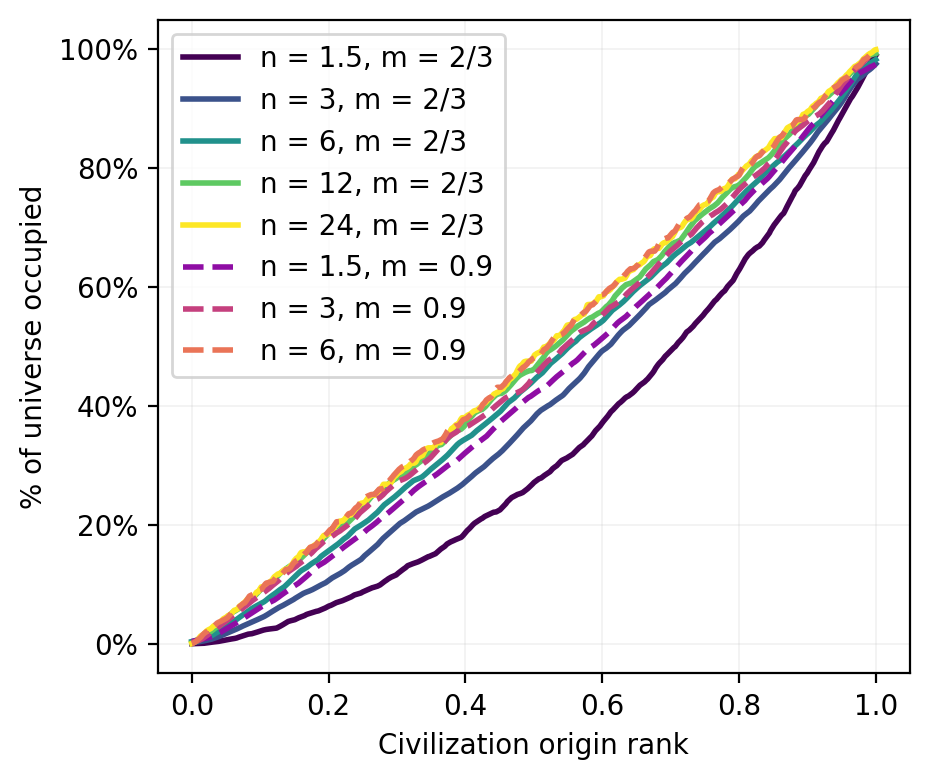

In [3]:
plot_data = {}
cmap1 = plt.get_cmap('viridis')
cmap2 = plt.get_cmap('plasma')

m = 2/3
true_nlist = [1.5, 3, 6, 12, 24]
nlist = [round(tnn/(1-m)-1, 4) for tnn in true_nlist]
mycols = cmap1(np.linspace(0, 1, len(nlist)))
num_empty = 100
#res_dir = 'nsc-setisaturday-numempty100'
randix = 0
fig = plt.figure(figsize=(5,4), dpi=200)
leg = []
for nix, n in enumerate(nlist):
    fout = (
        f"{res_dir}/D={D}_n={float(n)}_N={N:.2e}_"
        f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
    )
    true_n = true_nlist[nix]
    res = pd.read_csv(fout+'.csv')
    if smoothing_method == 'isotonic+rolling':
        irer = IsotonicRegression(y_min=0, y_max=1, out_of_bounds='clip')
        xvals = np.linspace(0,1, res.PctEmpty.shape[0])
        fitted_1minusPctEmpty = irer.fit_transform(X=xvals, y=1-res.PctEmpty)
        window_size = max(100,int(res.shape[0]/100))
        window_size = 100
        fitted_1minusPctEmpty = pd.Series(data=fitted_1minusPctEmpty).rolling(
            window=window_size, min_periods=1, win_type='gaussian', center=True
        ).mean(std=1000)
    else:
        assert(0)
    plt.plot(
        xvals, 
        fitted_1minusPctEmpty,
        '-',
        color=mycols[nix],
        linewidth=2,
    )
    leg.append(f'n = {true_n}, m = 2/3')
    
m = 0.90
true_nlist = [1.5, 3, 6]
nlist = [round(tnn/(1-m)-1, 6) for tnn in true_nlist]
mycols = cmap2(np.linspace(0.3, 1, len(nlist)+2))
res_dir = 'nsc-setisaturday-numempty200'
#res_dir = 'nsc-m90-numempty0'
randix = 0
for nix, n in enumerate(nlist):
    fout = (
        f"{res_dir}/D={D}_n={float(n):.5f}_N={N:.2e}_"
        f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
    )
    true_n = true_nlist[nix]
    res = pd.read_csv(fout+'.csv')
    if smoothing_method == 'isotonic+rolling':
        irer = IsotonicRegression(y_min=0, y_max=1, out_of_bounds='clip')
        xvals = np.linspace(0,1, res.PctEmpty.shape[0])
        fitted_1minusPctEmpty = irer.fit_transform(X=xvals, y=1-res.PctEmpty)
        window_size = max(100,int(res.shape[0]/100))
        window_size = 100
        fitted_1minusPctEmpty = pd.Series(data=fitted_1minusPctEmpty).rolling(
            window=window_size, min_periods=1, win_type='gaussian', center=True
        ).mean(std=1000)
    else:
        assert(0)
    plt.plot(
        xvals, 
        fitted_1minusPctEmpty,
        '--',
        color=mycols[nix],
        linewidth=2,
    )
    leg.append(f'n = {true_n}, m = 0.9')

plt.legend(leg);
plt.grid(linewidth=0.1);
plt.xlabel('Civilization origin rank');
plt.ylabel('% of universe occupied');
plt.gca().set_yticks(np.linspace(0, 1, 6));
plt.gca().set_yticklabels([f'{100*fo:.0f}%' for fo in list(np.linspace(0, 1, 6))]);
plt.tight_layout(rect=(0.05, 0.0, 1, 1))
plt.savefig('figures-friday/plotBm.png', dpi=200);